In [10]:
pip install folium pandas matplotlib seaborn plotly


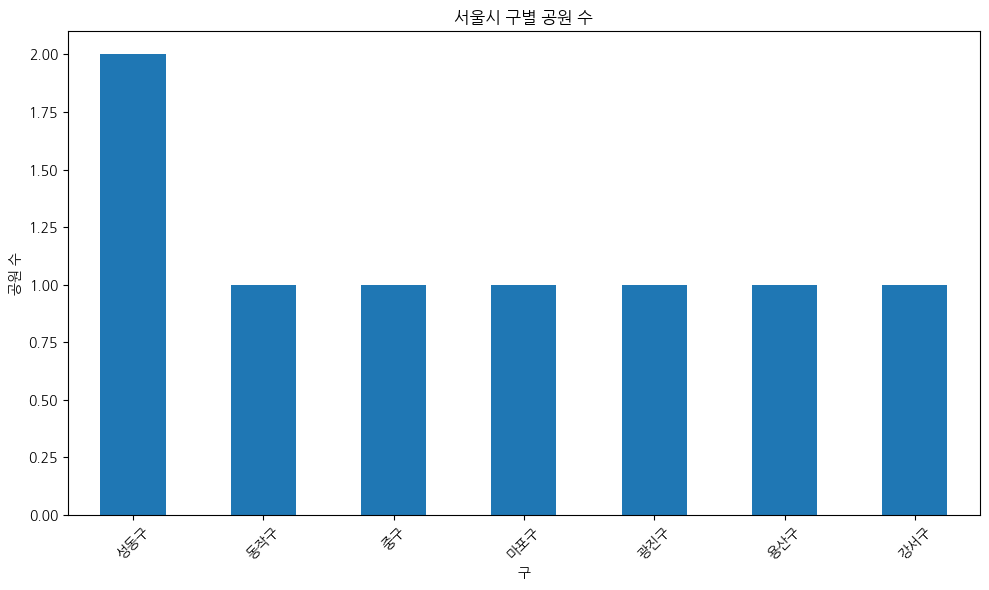

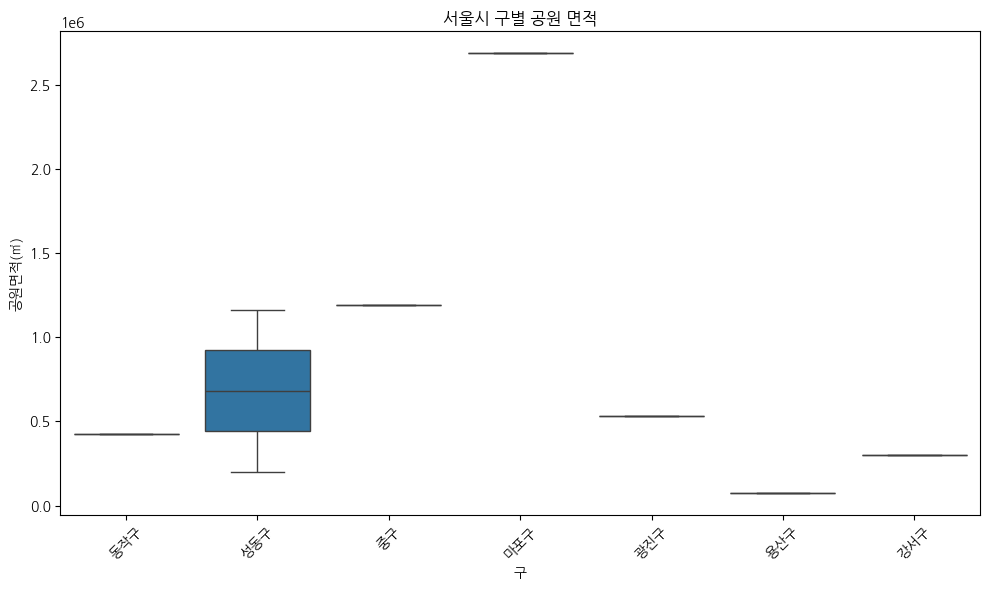

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from IPython.display import display, HTML
import matplotlib.font_manager as fm
import os

# 폰트 설치 및 시스템 업데이트
!apt-get install fonts-nanum -qq > /dev/null
!apt-get install fontconfig -qq > /dev/null
!fc-cache -fv > /dev/null

# 폰트 경로 직접 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 매니저에 명시적으로 등록
fontprop = fm.FontProperties(fname=font_path, size=12)
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기
df = pd.read_csv('seoul_parks.csv')

# 2. matplotlib 시각화
plt.figure(figsize=(10, 6))
df['구'].value_counts().plot(kind='bar')
plt.title('서울시 구별 공원 수')
plt.xlabel('구')
plt.ylabel('공원 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. seaborn 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='구', y='면적', data=df)
plt.title('서울시 구별 공원 면적')
plt.xlabel('구')
plt.ylabel('공원면적(㎡)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. plotly 시각화
fig = px.scatter(df, x='면적', y='구', hover_data=['이름'], title='공원 면적에 따른 구별 분포')
fig.show()

# 5. folium 지도 시각화
# 위도, 경도 데이터 유효성 검사
df_valid = df.dropna(subset=['위도', '경도'])

seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

for idx, row in df_valid.iterrows():
    try:
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=f"공원명: {row['이름']}\n면적: {row['면적']}㎡",
            tooltip=row['이름']
        ).add_to(seoul_map)
    except Exception as e:
        print(f"마커 추가 중 오류: {e}")

# Colab에서 지도 직접 표시
map_html = seoul_map._repr_html_()
display(HTML(map_html))